In [1]:
"""
ECGR 5105 - Intro to Machine Learning
Homework 3 - Part 3
Phillip Harmon
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Load and Build the Dataset
from sklearn.datasets import load_breast_cancer
loaded  = load_breast_cancer()
labels  = np.reshape(loaded.target, (len(loaded.target),1))
inputs  = pd.DataFrame(loaded.data)
names   = np.append(loaded.feature_names, 'label')
dataset = pd.DataFrame(np.concatenate([inputs,labels],axis=1))
dataset.columns = names
dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [3]:
#Sort Dataset
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values


In [4]:
#Clean the Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
 # scaler = StandardScaler() #MinMaxScaler gave better results.
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [5]:
#Perform PCA Feature Reduction, train-test split, and train the model for a variety of Principle Component Counts
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

frameLog = []
modelLog = []
accuracyLog = []
precisionLog = []
recallLog = []
cols = []
maxPC = len(x[0])+1

for k in range(1,maxPC):
    
    pca = PCA(n_components = k)
    pcs = pca.fit_transform(x)
    cols.append('PC'+str(k))
    pcFrame = pd.DataFrame(data=pcs,columns=cols)
    frameLog.append(pcFrame)
    
    xt, xv, yt, yv = train_test_split(pcFrame, y,
                                      train_size = 0.8, test_size = 0.2,
                                      random_state=1337)
    
    model = GaussianNB()
    model.fit(xt,yt);
    modelLog.append(model)
    
    yp = model.predict(xv)
    print("Classification Report for K={}".format(k))
    print("------------------------------------------------------")
    print(classification_report(yv,yp))
    print("Confusion Matrix")
    print(confusion_matrix(yv,yp))
    print("------------------------------------------------------\n")
    accuracyLog.append(accuracy_score(yv,yp))
    precisionLog.append(precision_score(yv,yp))
    recallLog.append(recall_score(yv,yp))
    

Classification Report for K=1
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        41
         1.0       0.91      0.96      0.93        73

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix
[[34  7]
 [ 3 70]]
------------------------------------------------------

Classification Report for K=2
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85        41
         1.0       0.90      0.95      0.92        73

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

Confusion Matrix
[[33  8]
 [ 4 69]]
------------------------------------------------

Classification Report for K=18
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        41
         1.0       0.91      0.93      0.92        73

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

Confusion Matrix
[[34  7]
 [ 5 68]]
------------------------------------------------------

Classification Report for K=19
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        41
         1.0       0.92      0.92      0.92        73

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

Confusion Matrix
[[35  6]
 [ 6 67]]
----------------------------------------------

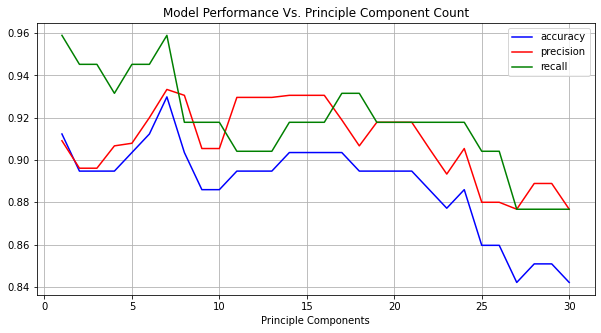

In [6]:
#print the training results with a plot
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Principle Components')
plt.title('Model Performance Vs. Principle Component Count')
plt.plot(range(1,maxPC),accuracyLog,color='blue',label='accuracy')
plt.plot(range(1,maxPC),precisionLog,color='red',label='precision')
plt.plot(range(1,maxPC),recallLog,color='green',label='recall')
plt.legend();


In [7]:
#Print Best Results
K = accuracyLog.index(max(accuracyLog))
print("According to the plot above, the highest accuracy occurs at a lowest dimensionality of K={}\n\n".format(K+1))
xt, xv, yt, yv = train_test_split(frameLog[K], y,train_size = 0.8, test_size = 0.2,random_state=1337)
yp = modelLog[K].predict(xv)
print("Classification Report for K={}".format(K+1))
print("------------------------------------------------------")
print(classification_report(yv,yp))


According to the plot above, the highest accuracy occurs at a lowest dimensionality of K=7


Classification Report for K=7
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        41
         1.0       0.93      0.96      0.95        73

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



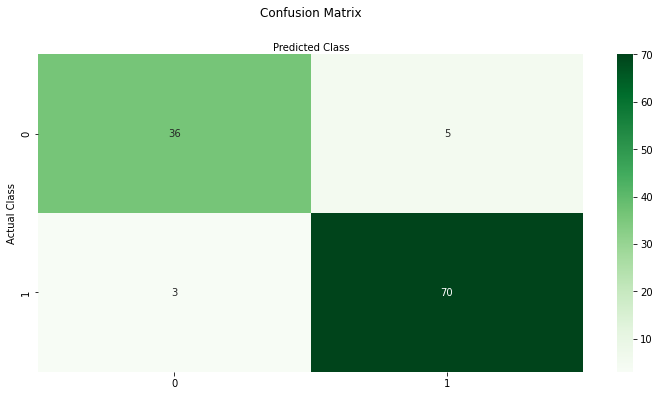

In [8]:
#Analyze using the Confusion Matrix
import seaborn as sns
classes = ['Benign','Malignant']
figure, axis = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion_matrix(yv,yp)),
            annot=True, cmap="Greens", fmt='g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');
